In [206]:
import numpy as np
import pandas as pd
import nltk



import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix
import streamlit as st


In [207]:
data = pd.read_csv("train.csv")
data.dropna(inplace=True)
# แบ่งข้อมูลออกเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(data['selected_text'], data['sentiment'], test_size=0.2, random_state=42)
# สร้างโมเดล
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

# ทดสอบโมเดล

predicted = model.predict(X_test)
print(classification_report(y_test, predicted))
accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

    negative       0.89      0.61      0.72      1572
     neutral       0.69      0.93      0.79      2236
    positive       0.89      0.75      0.82      1688

    accuracy                           0.78      5496
   macro avg       0.83      0.76      0.78      5496
weighted avg       0.81      0.78      0.78      5496

Accuracy: 0.7836608442503639


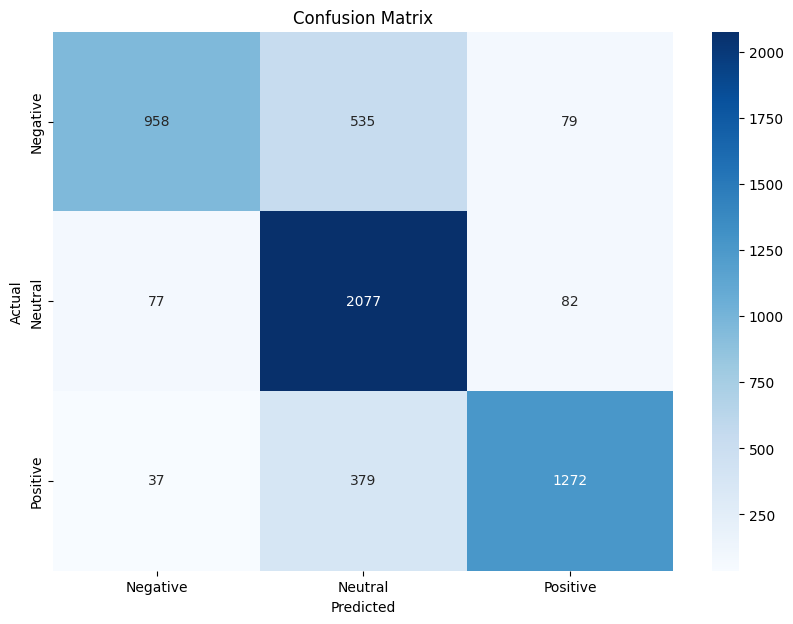

In [208]:
cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



In [212]:
nltk.download('punkt')
nltk.download('stopwords')  
nltk.download('punkt_tab')
ta['text_no_url'] = data['text'].str.replace(r'http\S+', '', regex=True)
print(nltk.data.path)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


NameError: name 'ta' is not defined

In [219]:
data['text_no_url'] = data['selected_text'].str.replace(r'http\S+', '', regex=True)
data['token'] = data['text_no_url'].apply(word_tokenize)
data['token']

0        [I, `, d, have, responded, ,, if, I, were, going]
1                                              [Sooo, SAD]
2                                           [bullying, me]
3                                       [leave, me, alone]
4                                [Sons, of, *, *, *, *, ,]
                               ...                        
27476                                            [d, lost]
27477                                [,, don, `, t, force]
27478                   [Yay, good, for, both, of, you, .]
27479             [But, it, was, worth, it, *, *, *, *, .]
27480    [All, this, flirting, going, on, -, The, ATG, ...
Name: token, Length: 27480, dtype: object

In [220]:
punkt = string.punctuation
punkt

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [221]:
data['token'] = data['token'].apply(lambda tokens: [word.lower() for word in tokens])
data['token']

0        [i, `, d, have, responded, ,, if, i, were, going]
1                                              [sooo, sad]
2                                           [bullying, me]
3                                       [leave, me, alone]
4                                [sons, of, *, *, *, *, ,]
                               ...                        
27476                                            [d, lost]
27477                                [,, don, `, t, force]
27478                   [yay, good, for, both, of, you, .]
27479             [but, it, was, worth, it, *, *, *, *, .]
27480    [all, this, flirting, going, on, -, the, atg, ...
Name: token, Length: 27480, dtype: object

In [222]:
stop_words = set(stopwords.words('english'))

In [223]:
data['token'] = data['token'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

In [224]:
data.head(261)

,textID,text,selected_text,sentiment,text_no_url,token
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"I`d have responded, if I were going","[`, responded, ,, going]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,Sooo SAD,"[sooo, sad]"
2,088c60f138,my boss is bullying me...,bullying me,negative,bullying me,[bullying]
3,9642c003ef,what interview! leave me alone,leave me alone,negative,leave me alone,"[leave, alone]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"Sons of ****,","[sons, *, *, *, *, ,]"
...,...,...,...,...,...,...
256,869bb56451,Sigh... you know I am...,Sigh... you know I am...,neutral,Sigh... you know I am...,"[sigh, ..., know, ...]"
257,09ad12cc5c,discovered cause of a bug in the new #NetPLAYE...,hopefully,positive,hopefully,[hopefully]
258,251aa82551,Here are 4 FREE twitter tools will get you fol...,Here are 4 FREE twitter tools will get you fol...,neutral,Here are 4 FREE twitter tools will get you fol...,"[4, free, twitter, tools, get, followers]"
259,8e0a0ffbe1,just got home from work.... and is chugging do...,just got home from work.... and is chugging do...,neutral,just got home from work.... and is chugging do...,"[got, home, work, ...., chugging, big, bottle,..."


In [205]:
%%writefile app.py

import numpy as np
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import streamlit as st

# ตรวจสอบว่ามีการดาวน์โหลดข้อมูล nltk ที่จำเป็น
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# โหลดข้อมูล
data = pd.read_csv("train.csv")  # ตรวจสอบเส้นทางไฟล์ให้ถูกต้อง
data.dropna(inplace=True)

# แบ่งข้อมูลออกเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(data['selected_text'], data['sentiment'], test_size=0.2, random_state=42)

# สร้างและฝึกโมเดล
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

# สร้าง UI ใน Streamlit
st.title("Tweet Sentiment Analysis")
st.write("ใส่ข้อความทวีตที่ต้องการวิเคราะห์ด้านล่าง:")

# รับข้อความจากผู้ใช้
user_input = st.text_area("ข้อความทวีต:", "")

if st.button("วิเคราะห์"):
    if user_input:
        # ทำการทำนาย
        prediction = model.predict([user_input])
        sentiment = prediction[0]

        st.write(f"ผลการวิเคราะห์: {sentiment}")

        # แสดง confusion matrix
        predictions_test = model.predict(X_test)  # ทำนายผลสำหรับชุดทดสอบ
        cm = confusion_matrix(y_test, predictions_test)
        
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title('Confusion Matrix')
        st.pyplot(plt)
    else:
        st.warning("กรุณาใส่ข้อความทวีตที่ต้องการวิเคราะห์")
